Continuation of the Covid-19 analysis

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import datetime
import warnings
 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

Let's import the data

In [2]:
df = pd.read_csv(r'C:\Users\agrae\Documents\AAA_Work\Coding\Springboard\HW\000_Capstone_2\Data\Clean_DF.csv')
df.drop('Unnamed: 0', inplace=True, axis=1)
df.head()

,Week Ending Date,COVID-19 Deaths,State,total_covid_deaths,GDP_millions,Republican,perc_pop_obese,pop_size,perc_pop_urban
0,01/04/2020,0.0,Alabama,0.0,228142.625,1,36.1,4903,59.0
1,01/11/2020,0.0,Alabama,0.0,228142.625,1,36.1,4903,59.0
2,01/18/2020,0.0,Alabama,0.0,228142.625,1,36.1,4903,59.0
3,01/25/2020,0.0,Alabama,0.0,228142.625,1,36.1,4903,59.0
4,02/01/2020,0.0,Alabama,0.0,228142.625,1,36.1,4903,59.0


Let's make the names a bit more managable

In [3]:
df.rename({'Week Ending Date':'Week', 'COVID-19 Deaths':'Deaths'}, inplace=True, axis=1)
df.head()

,Week,Deaths,State,total_covid_deaths,GDP_millions,Republican,perc_pop_obese,pop_size,perc_pop_urban
0,01/04/2020,0.0,Alabama,0.0,228142.625,1,36.1,4903,59.0
1,01/11/2020,0.0,Alabama,0.0,228142.625,1,36.1,4903,59.0
2,01/18/2020,0.0,Alabama,0.0,228142.625,1,36.1,4903,59.0
3,01/25/2020,0.0,Alabama,0.0,228142.625,1,36.1,4903,59.0
4,02/01/2020,0.0,Alabama,0.0,228142.625,1,36.1,4903,59.0


Let's see what kind of corrilations we can find and then plot them.

In [4]:
df.corr()

,Deaths,total_covid_deaths,GDP_millions,Republican,perc_pop_obese,pop_size,perc_pop_urban
Deaths,1.000000,0.578411,0.509218,-0.031906,-0.096084,0.525952,0.241108
total_covid_deaths,0.578411,1.000000,0.572420,-0.075448,-0.184191,0.589691,0.312998
GDP_millions,0.509218,0.572420,1.000000,-0.191731,-0.212692,0.979803,0.465354
Republican,-0.031906,-0.075448,-0.191731,1.000000,0.449373,-0.112707,-0.388880
perc_pop_obese,-0.096084,-0.184191,-0.212692,0.449373,1.000000,-0.165396,-0.470535
pop_size,0.525952,0.589691,0.979803,-0.112707,-0.165396,1.000000,0.450819
perc_pop_urban,0.241108,0.312998,0.465354,-0.388880,-0.470535,0.450819,1.000000


<AxesSubplot:>

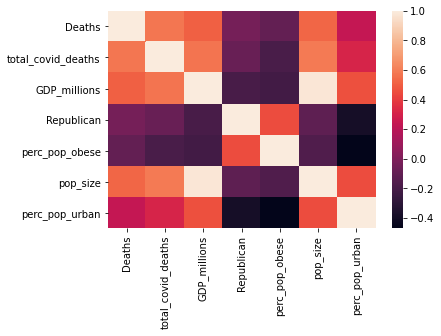

In [5]:
sns.heatmap(data=df.corr())

This is at least a good sanity check. We can see that Republican states are usually negatively corrilated with the percentage of the population that is urban. Let's plot total deaths over time and normalize the total deaths with population size after we change the Week column into a datetime object.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Week                3400 non-null   object 
 1   Deaths              3400 non-null   float64
 2   State               3400 non-null   object 
 3   total_covid_deaths  3400 non-null   float64
 4   GDP_millions        3400 non-null   float64
 5   Republican          3400 non-null   int64  
 6   perc_pop_obese      3400 non-null   float64
 7   pop_size            3400 non-null   int64  
 8   perc_pop_urban      3400 non-null   float64
dtypes: float64(5), int64(2), object(2)
memory usage: 239.2+ KB


In [7]:
df['Week'] = pd.to_datetime(df.Week)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Week                3400 non-null   datetime64[ns]
 1   Deaths              3400 non-null   float64       
 2   State               3400 non-null   object        
 3   total_covid_deaths  3400 non-null   float64       
 4   GDP_millions        3400 non-null   float64       
 5   Republican          3400 non-null   int64         
 6   perc_pop_obese      3400 non-null   float64       
 7   pop_size            3400 non-null   int64         
 8   perc_pop_urban      3400 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(1)
memory usage: 239.2+ KB


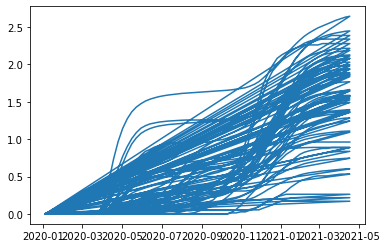

In [8]:
y = df.total_covid_deaths/df.pop_size
x = df.Week
plt.plot(x, y)

<AxesSubplot:xlabel='Week'>

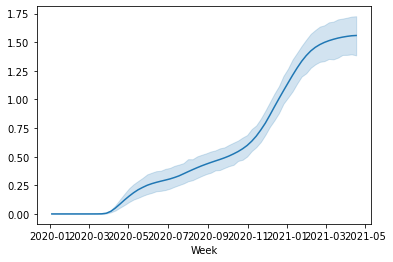

In [9]:
sns.lineplot(x=x, y=y)